In [1]:
import pandas as pd

df_final = pd.read_csv(r"C:\Users\ADMIN\Desktop\df_final.csv")
print(df_final.head())



            orderid cashier    saledate  total  customerid  ticketcode  \
0  10006052019B0225  emp002  2019-05-06  90000  0000000014    20074925   
1  10006052019B0225  emp002  2019-05-06  90000  0000000014    20074924   
2  10022052019B0167  emp011  2019-05-22  90000  0000000034    20097042   
3  10022052019B0167  emp011  2019-05-22  90000  0000000034    20097041   
4  10130052019B0141  emp005  2019-05-30  90000  0000000034    20106761   

         date                 time slot  room  ...      job        industry  \
0  2019-05-06  1900-01-01 18:15:00  G04     3  ...  student        computer   
1  2019-05-06  1900-01-01 18:15:00  G03     3  ...  student        computer   
2  2019-05-22  1900-01-01 20:45:00  E04     2  ...  student  health service   
3  2019-05-22  1900-01-01 20:45:00  E03     2  ...  student  health service   
4  2019-05-30  1900-01-01 19:30:00  F04     1  ...  student  health service   

                                     title                      director  \
0   

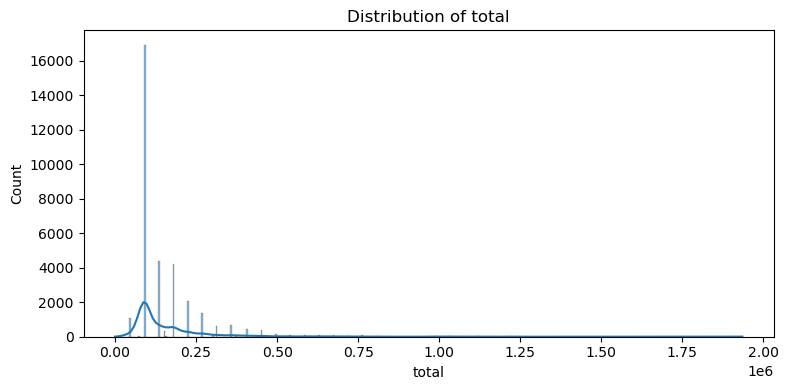

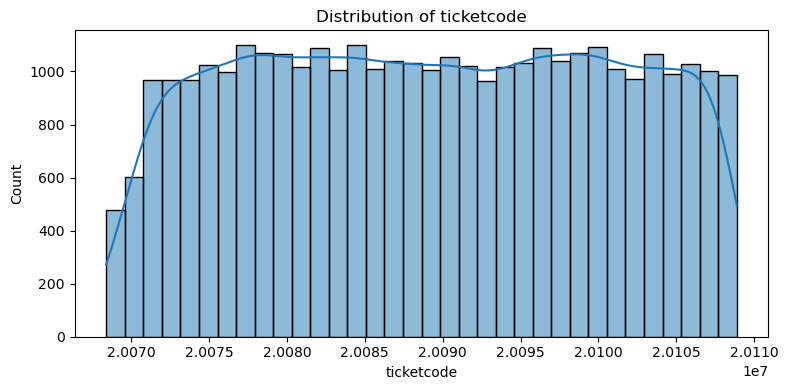

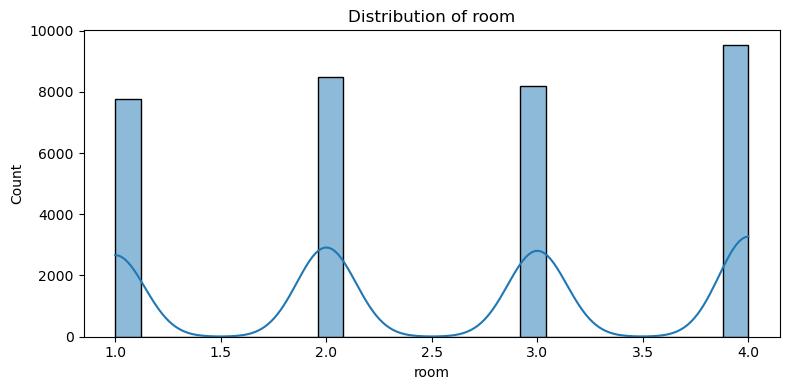

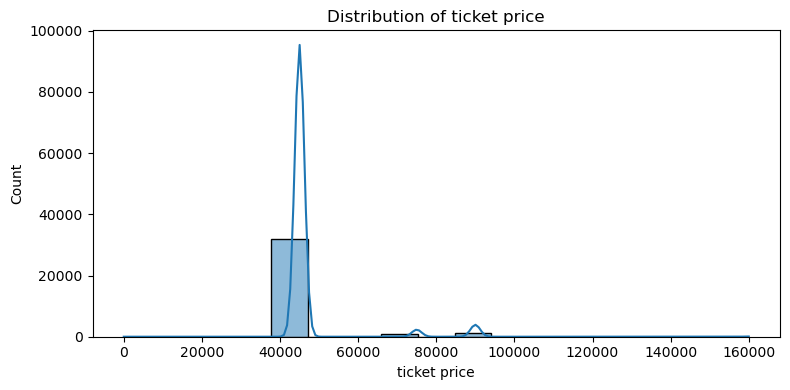

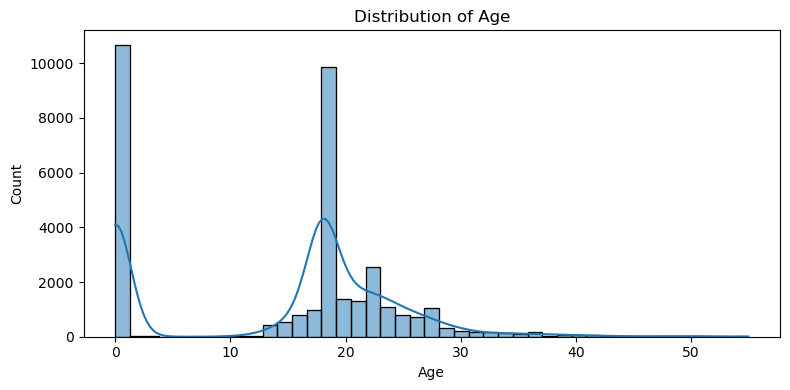

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df_final.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_final[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8536\135348480.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_weekday.index, y=revenue_by_weekday.values, palette='viridis')


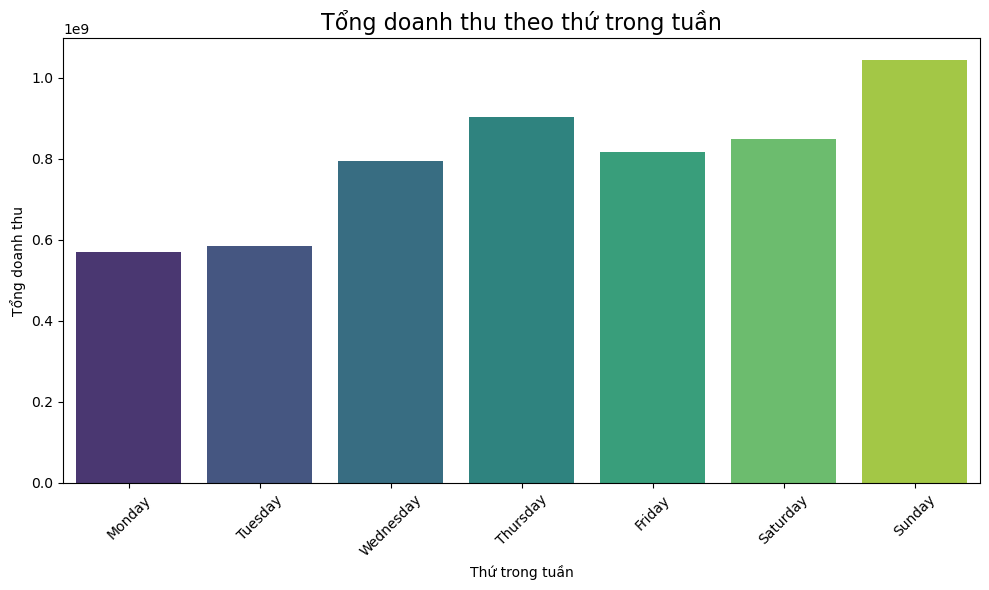

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

df_final['saledate'] = pd.to_datetime(df_final['saledate'], errors='coerce')


df_final['weekday'] = df_final['saledate'].dt.day_name()

# Tính tổng doanh thu theo thứ
revenue_by_weekday = df_final.groupby('weekday')['total'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_weekday.index, y=revenue_by_weekday.values, palette='viridis')
plt.title('Tổng doanh thu theo thứ trong tuần', fontsize=16)
plt.xlabel('Thứ trong tuần')
plt.ylabel('Tổng doanh thu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

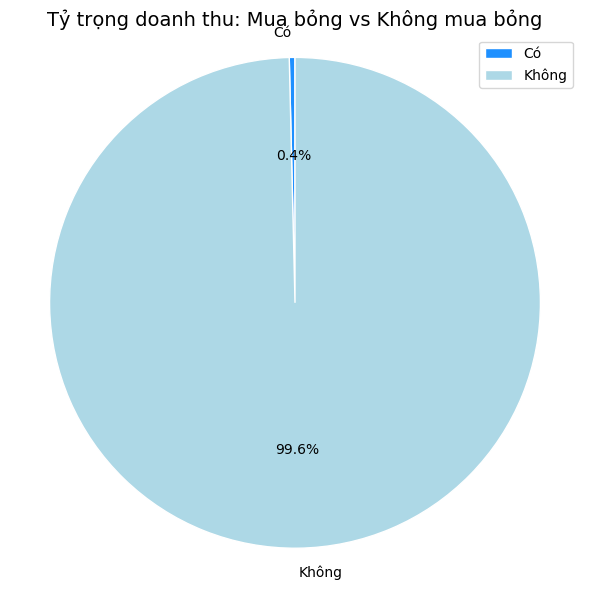

In [3]:
df_no_popcorn = df_final[df_final['popcorn'].str.lower() == 'Không']
revenue_by_popcorn = df_final.groupby('popcorn')['total'].sum()
plt.figure(figsize=(6, 6))
plt.pie(
    revenue_by_popcorn.values,
    labels=revenue_by_popcorn.index,
    autopct='%1.1f%%',
    colors=['dodgerblue', 'lightblue'],
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Tỷ trọng doanh thu: Mua bỏng vs Không mua bỏng', fontsize=14)
plt.axis('equal')  # Đảm bảo hình tròn
plt.legend()
plt.tight_layout()
plt.show()



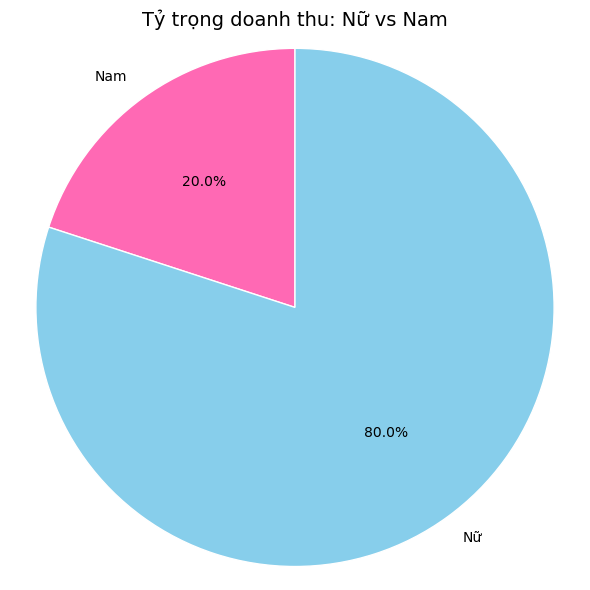

In [4]:
import matplotlib.pyplot as plt

# Tính tổng doanh thu theo giới tính
revenue_by_gender = df_final.groupby('Gender')['total'].sum()

# Vẽ pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    revenue_by_gender.values,
    labels=revenue_by_gender.index,
    autopct='%1.1f%%',
    colors=['hotpink', 'skyblue'],
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Tỷ trọng doanh thu: Nữ vs Nam', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


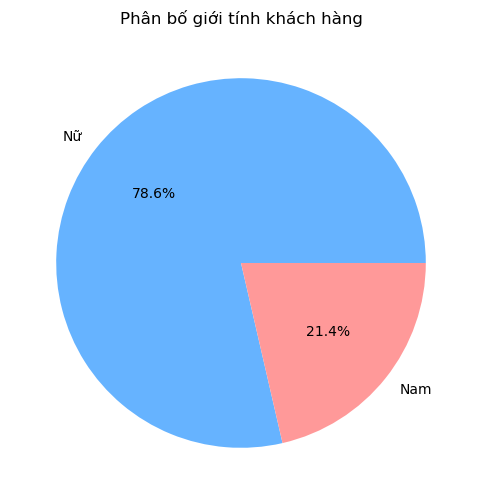

In [20]:
plt.figure(figsize=(6, 6))
df_final['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Phân bố giới tính khách hàng')
plt.ylabel('')
plt.show()





Quận/Huyện
Liên Chiểu      2166660000
Sơn Trà         1619100000
Hải Châu         598795000
Thanh Khê        479865000
Ngũ Hành Sơn     285065000
Cẩm Lệ           212745000
Hòa Vang         198590000
Name: total, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8536\2788313379.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_district.index, y=revenue_by_district.values, palette='viridis')


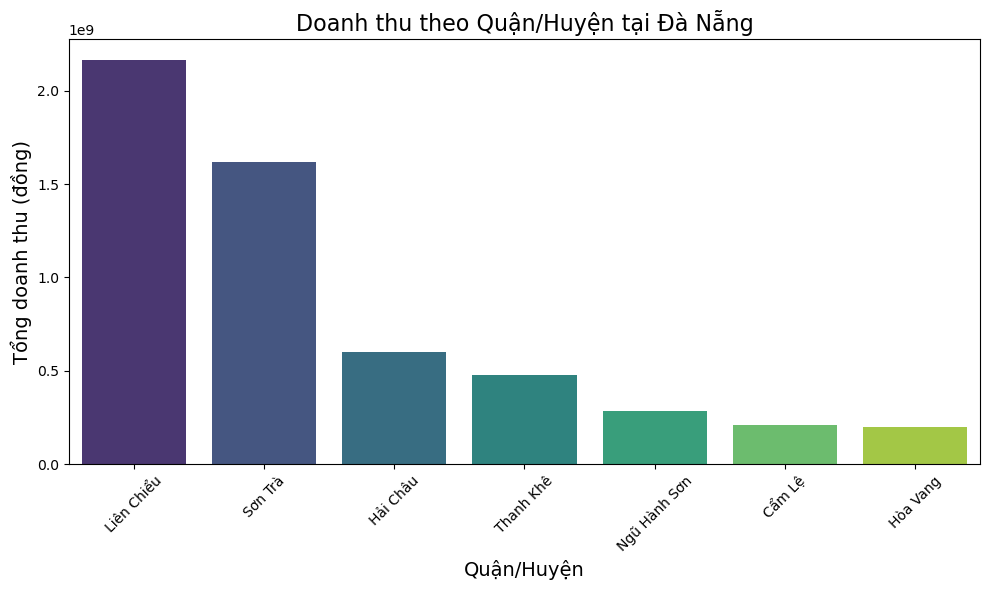

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc dữ liệu chỉ lấy những giao dịch tại Đà Nẵng
df_danang = df_final[df_final['Tỉnh'] == 'Đà Nẵng']

# Nhóm theo Quận/Huyện và tính tổng doanh thu
revenue_by_district = df_danang.groupby('Quận/Huyện')['total'].sum()

# Sắp xếp theo doanh thu giảm dần để dễ nhận biết Quận/Huyện có doanh thu cao nhất
revenue_by_district = revenue_by_district.sort_values(ascending=False)

# In kết quả ra console (tùy chọn)
print(revenue_by_district)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_district.index, y=revenue_by_district.values, palette='viridis')
plt.title("Doanh thu theo Quận/Huyện tại Đà Nẵng", fontsize=16)
plt.xlabel("Quận/Huyện", fontsize=14)
plt.ylabel("Tổng doanh thu (đồng)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


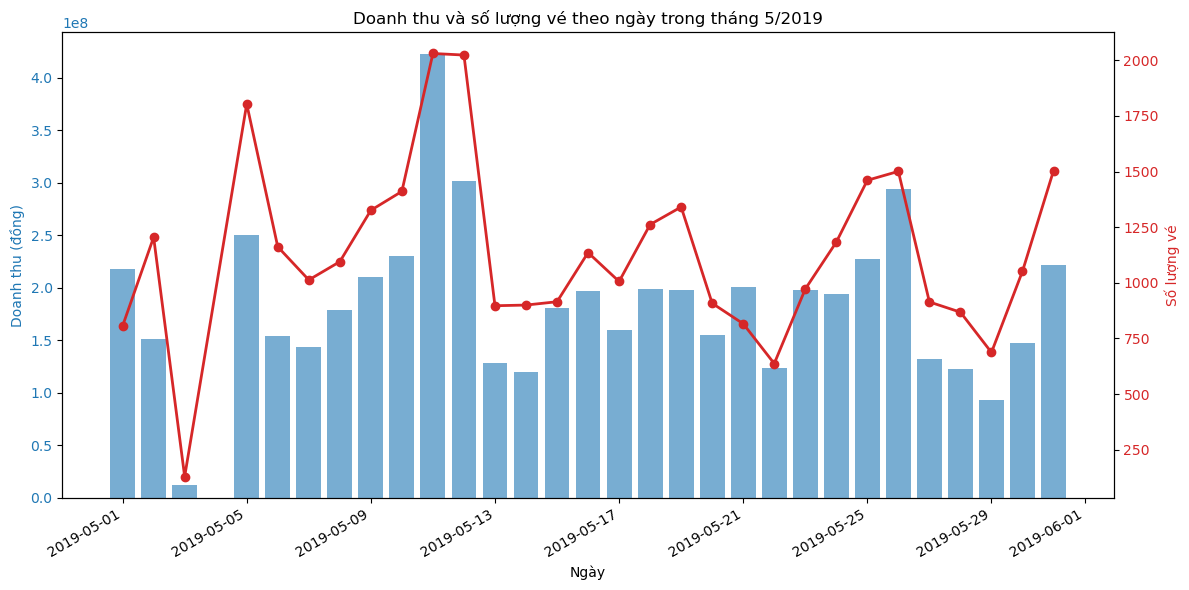

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ép kiểu cột 'saledate' sang datetime theo định dạng M/D/YYYY (ví dụ: 5/6/2019)
df_final['saledate'] = pd.to_datetime(df_final['saledate'], format='%m/%d/%Y', errors='coerce')

# 2. Lọc dữ liệu trong tháng 5/2019
df_may2019 = df_final[(df_final['saledate'].dt.month == 5) & (df_final['saledate'].dt.year == 2019)]

# 3. Nhóm dữ liệu theo từng ngày:
#    - Tính tổng doanh thu theo ngày (cột 'total')
#    - Đếm số lượng vé bán được (ở đây dùng đếm số dòng; mỗi dòng ứng với 1 vé)
daily_data = df_may2019.groupby(df_may2019['saledate'].dt.date).agg(
    revenue=('total', 'sum'),
    ticket_count=('orderid', 'count')
).reset_index()

# Chuyển đổi cột ngày về dạng datetime (để dễ vẽ biểu đồ theo trục x)
daily_data['saledate'] = pd.to_datetime(daily_data['saledate'])

# 4. Vẽ biểu đồ kết hợp: 
#    - Trục y bên trái: doanh thu (biểu đồ cột)
#    - Trục y bên phải: số lượng vé (đường có marker)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ cột cho doanh thu (màu xanh dương)
color_bar = 'tab:blue'
ax1.set_xlabel('Ngày')
ax1.set_ylabel('Doanh thu (đồng)', color=color_bar)
ax1.bar(daily_data['saledate'], daily_data['revenue'], color=color_bar, alpha=0.6, label='Doanh thu')
ax1.tick_params(axis='y', labelcolor=color_bar)

# Tạo trục y thứ hai để vẽ số lượng vé
ax2 = ax1.twinx()  
color_line = 'tab:red'
ax2.set_ylabel('Số lượng vé', color=color_line)
ax2.plot(daily_data['saledate'], daily_data['ticket_count'], color=color_line, marker='o', linewidth=2, label='Số lượng vé')
ax2.tick_params(axis='y', labelcolor=color_line)

# Tiêu đề và định dạng trục x
plt.title('Doanh thu và số lượng vé theo ngày trong tháng 5/2019')
fig.autofmt_xdate()  # Xoay nhãn ngày cho dễ đọc
plt.tight_layout()
plt.show()


  slot type price_level  ticket_count  total_revenue
0       ĐÔI   New Price            26        4800000
1       ĐÔI   Old Price          1304      133875000
2       ĐƠN   New Price           771      211500000
3       ĐƠN   Old Price         31865     5210645000


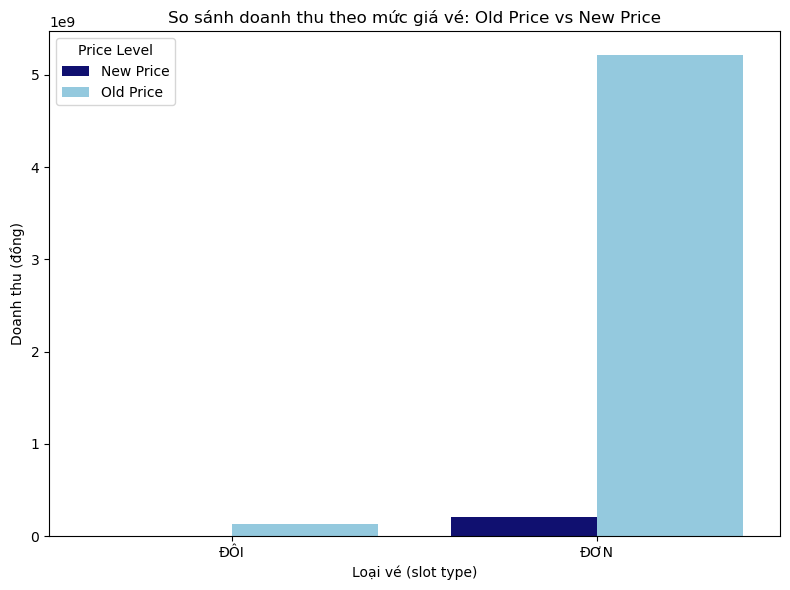

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df_final đã được load sẵn và cột 'ticket price' đã ở dạng số
df_final['ticket price'] = pd.to_numeric(df_final['ticket price'], errors='coerce')

# Xác định mức giá cũ và mới dựa trên cột "slot type"
# Sử dụng cột 'slot type' vì nó chứa thông tin "ĐƠN" hay "ĐÔI"
def label_price(row):
    # Với vé "ĐƠN": nếu giá vé >= 75.000 thì xem là giá tăng (New Price), ngược lại là Old Price.
    if row['slot type'] == 'ĐƠN':
        return 'New Price' if row['ticket price'] >= 75000 else 'Old Price'
    # Với vé "ĐÔI": nếu giá vé >= 160.000 thì xem là giá tăng (New Price), ngược lại là Old Price.
    elif row['slot type'] == 'ĐÔI':
        return 'New Price' if row['ticket price'] >= 160000 else 'Old Price'
    else:
        return 'Other'

# Áp dụng hàm trên cho từng dòng
df_final['price_level'] = df_final.apply(label_price, axis=1)

# Nhóm theo 'slot type' và 'price_level' để tính số lượng vé và tổng doanh thu
agg_data = df_final.groupby(['slot type', 'price_level']).agg(
    ticket_count=('orderid', 'count'),
    total_revenue=('total', 'sum')
).reset_index()

print(agg_data)

plt.figure(figsize=(8,6))
sns.barplot(data=agg_data, x='slot type', y='total_revenue', hue='price_level',
            palette={'Old Price': 'skyblue', 'New Price': 'navy', 'Other': 'gray'})

plt.xlabel('Loại vé (slot type)')
plt.ylabel('Doanh thu (đồng)')
plt.title('So sánh doanh thu theo mức giá vé: Old Price vs New Price')
plt.legend(title='Price Level')
plt.tight_layout()
plt.show()


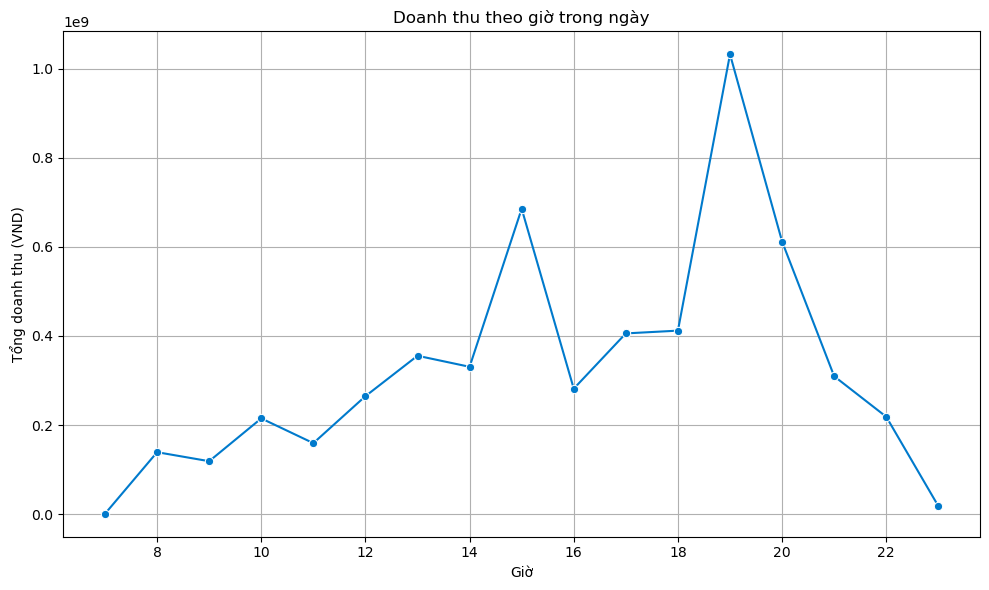

In [18]:
# Tạo cột giờ nếu chưa có
df_final['hour'] = pd.to_datetime(df_final['time'], errors='coerce').dt.hour

# Tính tổng doanh thu theo giờ
hourly_revenue = df_final.groupby('hour')['total'].sum().sort_index()

# Vẽ biểu đồ
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_revenue.index, y=hourly_revenue.values, marker='o', color='#007acc')
plt.title("Doanh thu theo giờ trong ngày")
plt.xlabel("Giờ")
plt.ylabel("Tổng doanh thu (VND)")
plt.grid(True)
plt.tight_layout()
plt.show()


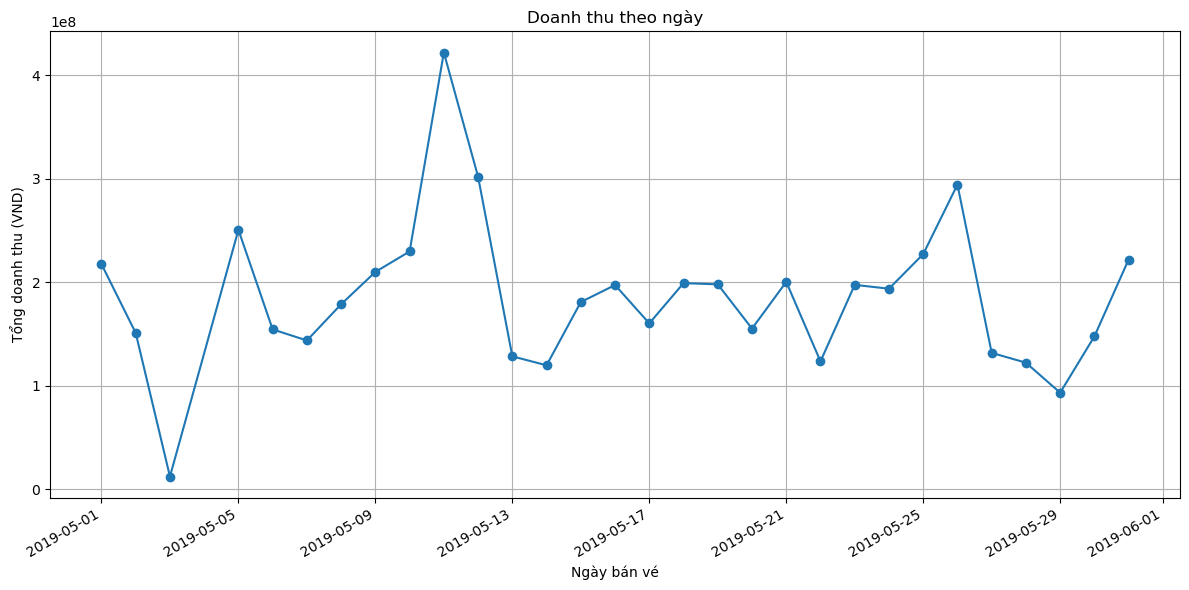

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_final['saledate'] = pd.to_datetime(df_final['saledate'])
sales_by_day = df_final.groupby('saledate')['total'].sum()

plt.figure(figsize=(12, 6))
sales_by_day.plot(kind='line', marker='o')
plt.title('Doanh thu theo ngày')
plt.xlabel('Ngày bán vé')
plt.ylabel('Tổng doanh thu (VND)')
plt.grid(True)
plt.tight_layout()
plt.show()


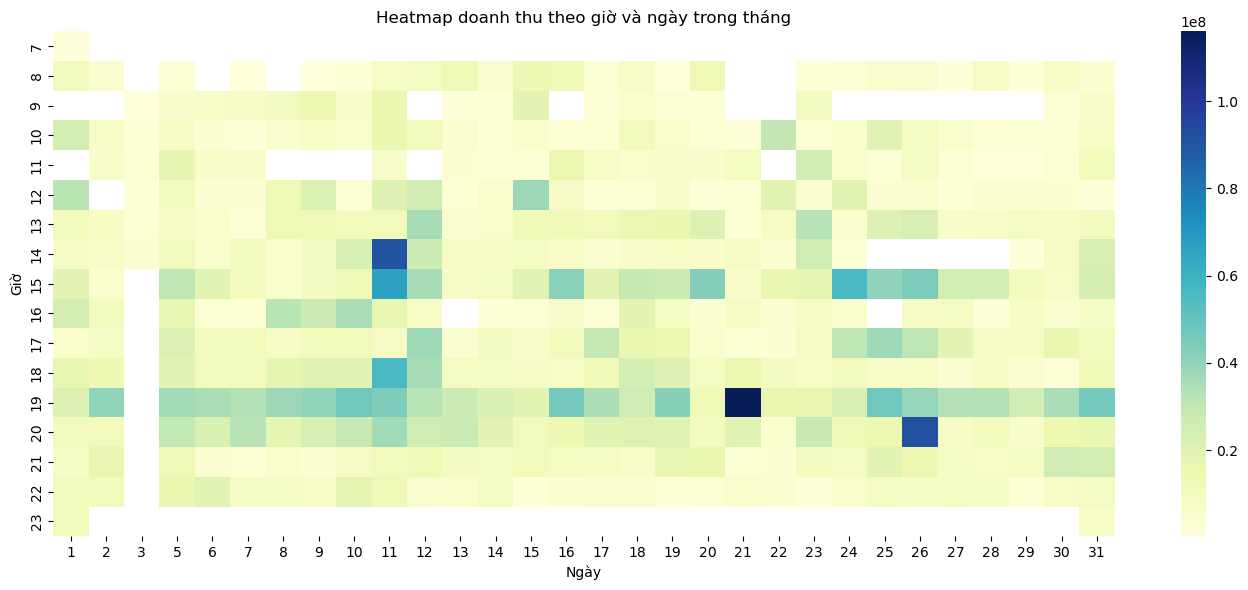

In [14]:
# Nếu chưa có, tách ngày & giờ
df_final['day'] = pd.to_datetime(df_final['saledate']).dt.day
df_final['hour'] = pd.to_datetime(df_final['time'], errors='coerce').dt.hour

heatmap_data = df_final.pivot_table(index='hour', columns='day', values='total', aggfunc='sum')

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title("Heatmap doanh thu theo giờ và ngày trong tháng")
plt.xlabel("Ngày")
plt.ylabel("Giờ")
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8536\82154885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies.values, y=top_movies.index, palette='viridis')


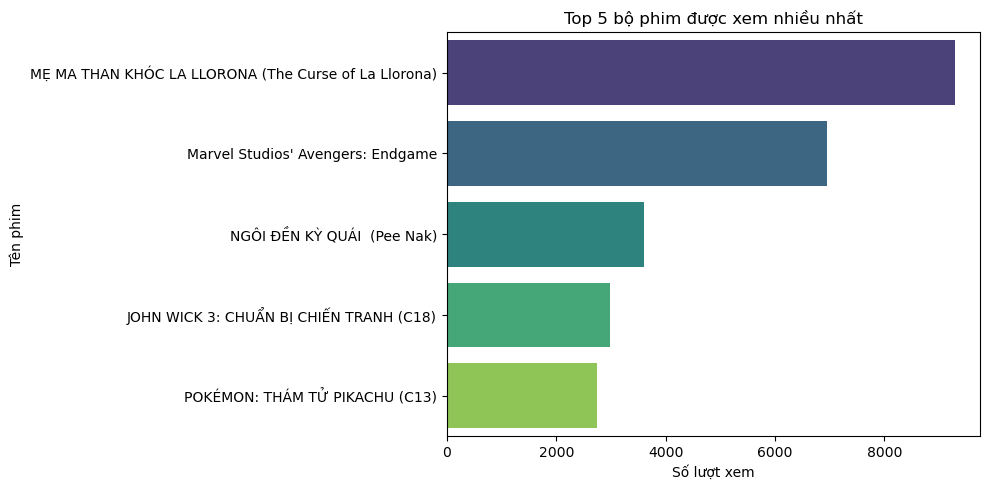

In [ ]:
#Top 5 bộ phim được xem nhiều nhất
top_movies = df_final['title'].value_counts().head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_movies.values, y=top_movies.index, palette='viridis')
plt.title('Top 5 bộ phim được xem nhiều nhất')
plt.xlabel('Số lượt xem')
plt.ylabel('Tên phim')
plt.tight_layout()
plt.show()




C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8536\1499325433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='Time of day', palette='pastel')


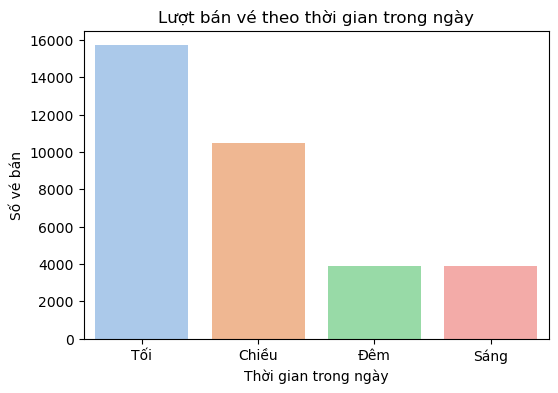

In [25]:
#Lượt bán vé theo khung giờ
plt.figure(figsize=(6, 4))
sns.countplot(data=df_final, x='Time of day', palette='pastel')
plt.title('Lượt bán vé theo thời gian trong ngày')
plt.xlabel('Thời gian trong ngày')
plt.ylabel('Số vé bán')
plt.show()
